<a href="https://colab.research.google.com/github/Gauranga2022/Fun-with-Python/blob/main/The_Butterfly_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chaos

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import colorsys
import math
import os

## Initial Observations

The ```Logistic map``` is a polynomial mapping (equivalently, recurrence relation) of degree 2 was popularized in a 1976 paper by the biologist Robert May, in part as a discrete-time demographic model analogous to the logistic equation written down by Pierre François Verhulst. Mathematically, the logistic map is written

where $x_n$ is a number between zero and one, which represents the ratio of existing population to the maximum possible population (will simply refer to it as population) and r is the growth rate. This nonlinear difference equation is intended to capture two effects:

1. Reproduction, where the population will increase at a rate proportional to the current population when the population size is small and
2. Starvation, where the growth rate will decrease at a rate proportional to the value obtained by taking the theoretical "carrying capacity" of the environment less the current population.

The function $pop(n, x_0, r)$ below provides the value of the population after $n$ generations starting from an initial population of $x_0$ and with a growth rate of $r$.

In [130]:
def pop(n, x0, r): #either use a recursive step with memoisation or use an iterative method
  x = x0
  y = r*x*(1-x)
  i = 0
  while i < n:
    x = y
    y = r*x*(1-x)
    i+=1
  return(x)

In [131]:
pop(10, 0.4, 3), pop(11, 0.4, 3), pop(12, 0.4, 3), pop(13, 0.4, 3), pop(25, 0.4, 3)

(0.6169344141830806,
 0.7089790283389793,
 0.6189832971434882,
 0.7075289250025932,
 0.7012319974231519)

How does the plots look like if you plot $n$ vs $x_n$ for different values of $r$ ? Heres a function that takes in a list of initialisations $(x_0)$ and a fixed 'rate' and plots it! Observe that when rate > 3, the plot seems to converge to two (bifurcates) values unlike seeming to coverge to a single value when rate < 3.You cannot use $x = rx(x-1)$ and solve for $x$ (ofcourse in terms of $r$, which is given) because you dont know yet $x_n$ converges. Till then, we use visual tools

In [132]:
def plot(init_list, rate):
  for  j in init_list:
    xlist = np.linspace(1,70,70)
    ylist = []
    for i in xlist:
      ylist.append(pop(i, j, rate))
    plt.plot(xlist, ylist, linewidth = 1)
    plt.xlabel("n: iteration")
    plt.ylabel("xn: population after iteration n")
    plt.title("xn vs n")

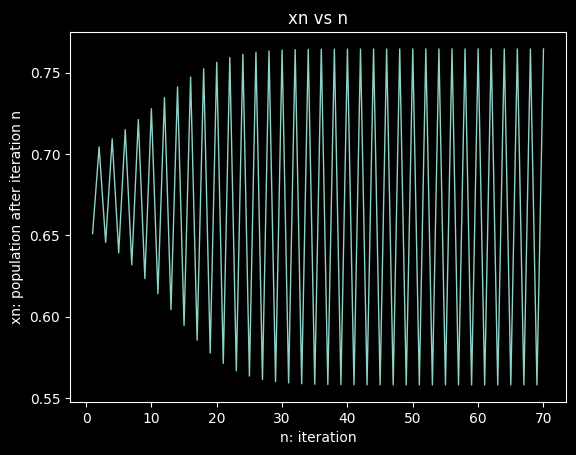

In [133]:
plot([0.3], 3.1) #period doubling bifurcation

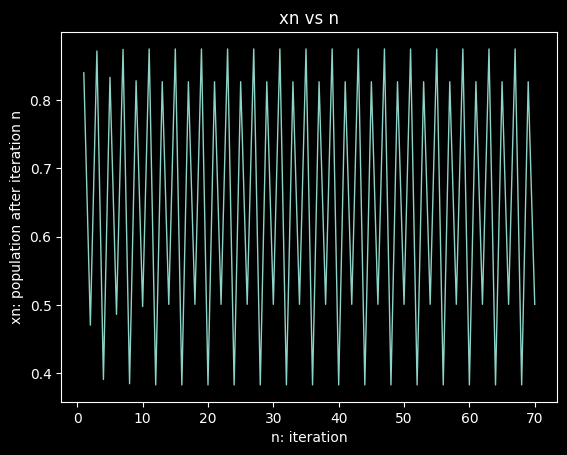

In [134]:
plot([0.4], 3.5) #4 cycle-periodic

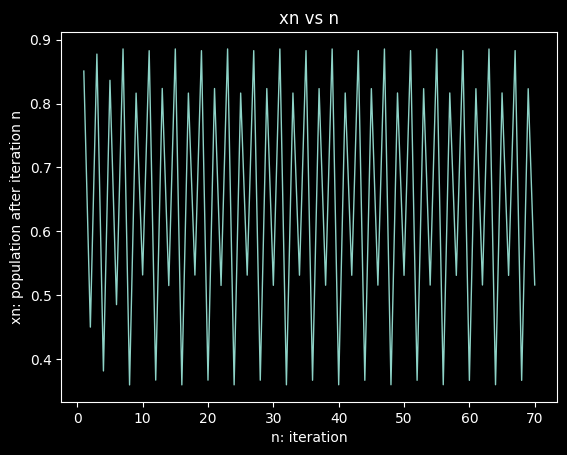

In [135]:
plot([0.4], 3.545) #8 cycle-periodic

Observe what happens when the starting population proportion is shifted by a factor of one millionth when $r=3.7$ :

In [146]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


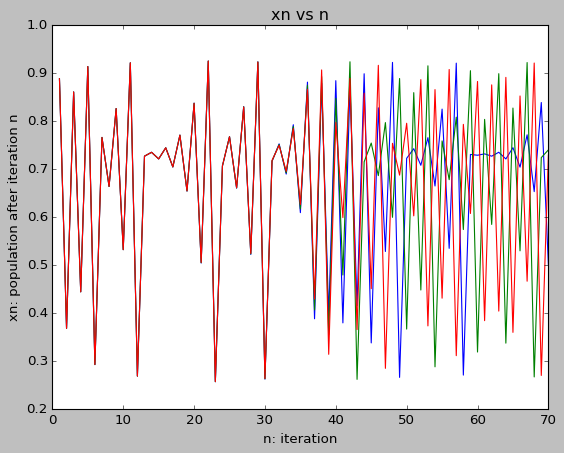

In [153]:
plot([0.4000000, 0.4000001, 0.4000002], 3.7) #chaos.
plt.style.use('fivethirtyeight')

## The bifurcation diagram

What do these shapes mean? It is worth remembering what this orbit diagram represents: a collection of single iterations with very slightly different $r$
values, the previous iteration population size being the input for the current iteration. This is why the chaotic regions appear to be filled with static: points that are the result of one iteration of the logistic equation are plotted, but the next point is mostly unpredictable and thus may land anywhwere within a given region. The shapes, ie regions of higher point density, are values that are more common to iterations of changing $r$ values.

In [137]:
def logistic_map(r, y):
	y_next = r * y * (1 - y)
	x_next = r + 0.0000001
	return x_next, y_next

In [138]:
logistic_map(3.3, 0.2)

(3.3000000999999997, 0.528)

In [139]:
1 + 30000000*0.0000001

4.0

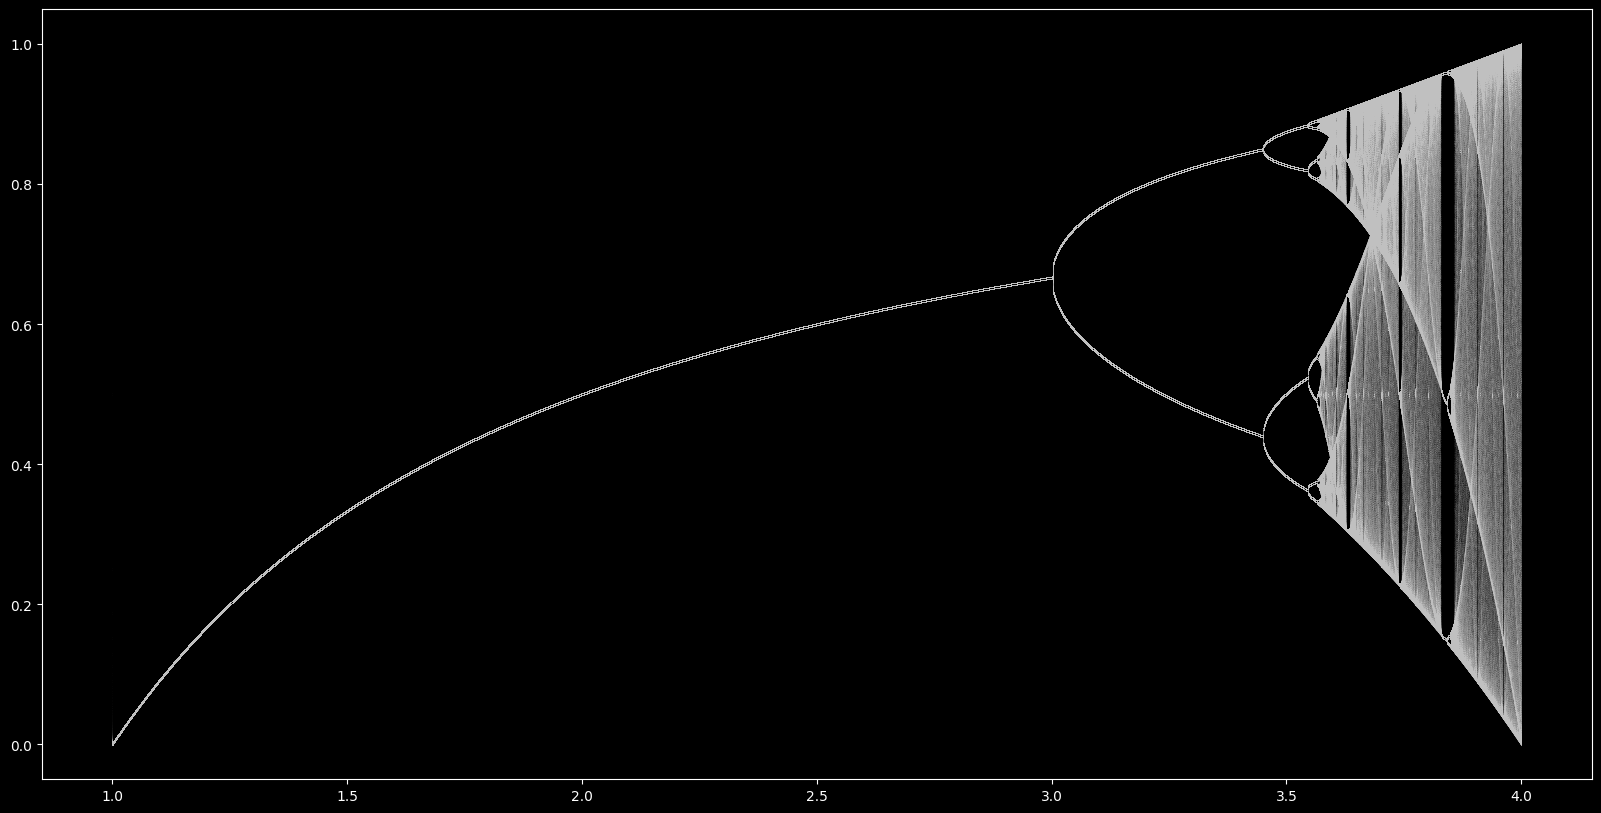

In [140]:
steps = 30000000

Y = np.zeros(steps + 1)
X = np.zeros(steps + 1)

X[0], Y[0] = 1, 0.5

# map the equation to array step by step using the logistic_map function above
for i in range(steps):
  x_next, y_next = logistic_map(X[i], Y[i]) # calls the logistic_map function on X[i] as x and Y[i] as y
  X[i+1] = x_next
  Y[i+1] = y_next
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.plot(X, Y, '^', color='white', alpha = 0.7, markersize = 0.001)
plt.axis('on')
plt.show()

##The Mandelbrot set
The Mandelbrot set is the set of values of $c$ (in the complex plane, for simplicity, assume c ∈ $ℜ^2$) for which the orbit of the critical point $z=0$ under the iteration of the quadratic map
$$z_{n+1} = z_{n}^{2}+c$$
remains bounded.Thus, a complex number $c$ is a member of the Mandelbrot set if, when starting with $z_{0}=0$ and applying the iteration repeatedly, the absolute value of  $z_{n}$ remains bounded for all $n > 0$.

For example, for $c = 1$, the sequence is $0, 1, 2, 5, 26, ...,$ which tends to infinity, so 1 is not an element of the Mandelbrot set. On the other hand, for
$c=-1$, the sequence is $0, -1, 0, -1, 0, ...,$ which is bounded, so -1 does belong to the set.

### [Visualizing the Mandelbrot Set Using Python (< 50 Lines)](https://medium.com/swlh/visualizing-the-mandelbrot-set-using-python-50-lines-f6aa5a05cf0f)

In [ ]:
#frame parameters
width = 1000 #pixels
x = -0.65
y = 0
xRange = 3.4
aspectRatio = 4/3

precision = 500

height = round(width / aspectRatio)
yRange = xRange / aspectRatio
minX = x - xRange / 2
maxX = x + xRange / 2
minY = y - yRange / 2
maxY = y + yRange / 2

img = Image.new('RGB', (width, height), color = 'black')
pixels = img.load()

def logColor(distance, base, const, scale):
    color = -1 * math.log(distance, base)
    rgb = colorsys.hsv_to_rgb(const + scale * color,0.8,0.9)
    return tuple(round(i * 255) for i in rgb)

def powerColor(distance, exp, const, scale):
    color = distance**exp
    rgb = colorsys.hsv_to_rgb(const + scale * color,1 - 0.6 * color,0.9)
    return tuple(round(i * 255) for i in rgb)

for row in range(height):
    for col in range(width):
        x = minX + col * xRange / width
        y = maxY - row * yRange / height
        oldX = x
        oldY = y
        for i in range(precision + 1):
            a = x*x - y*y #real component of z^2
            b = 2 * x * y #imaginary component of z^2
            x = a + oldX #real component of new z
            y = b + oldY #imaginary component of new z
            if x*x + y*y > 4:
                break
        if i < precision:
            distance = (i + 1) / (precision + 1)
            rgb = powerColor(distance, 0.2, 0.27, 1.0)
            pixels[col,row] = rgb
        index = row * width + col + 1
        print("{} / {}, {}%".format(index, width * height, round(index / width / height * 100 * 10) / 10))

img.save('output.png')
os.system('open output.png')

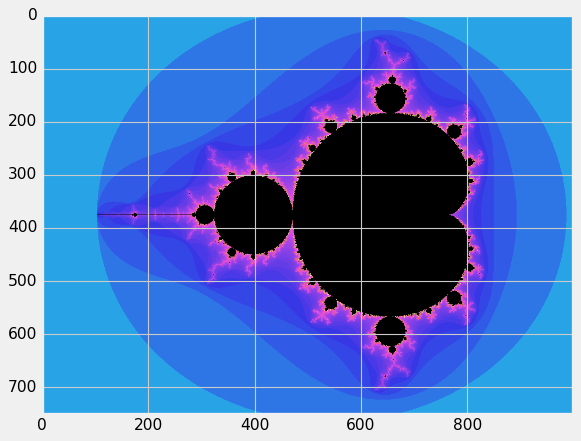

In [175]:
import matplotlib.image as mpimg
image_path = "/content/output.png"
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

Substitute
$$x_n = \frac{1-2w_n}{2λ}$$ in
$$x_{n+1}=rx_{n}(1-x_{n}), $$ gives
$$z_{n+1} = z_{n}^2 + c$$ where $z_{n+1} = -x_{n+1}$; $z_{n} = \frac{1-2w_{n}-λ^2}{2\sqrt{λ}}$ and $c = -\frac{λ}{2}$. Thus the Logistic map is actually a part of the Mandelbrot set!






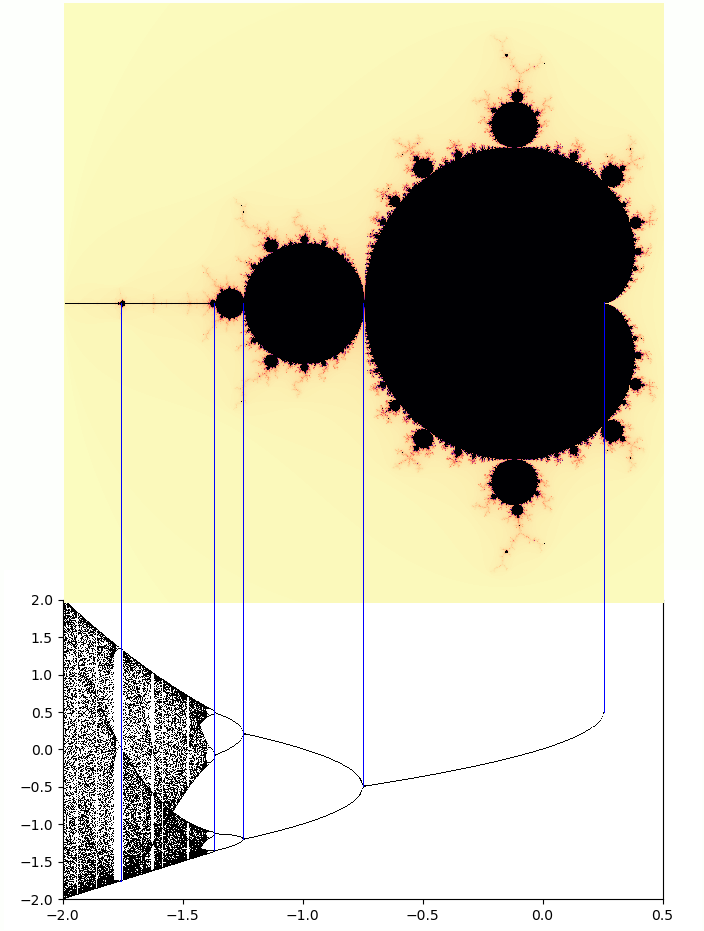
